# **Credit Card Fraud Detection Project**

## **1. Problem Statement**

The objective of this project is to build a machine learning model capable of accurately identifying fraudulent credit card transactions. This is crucial for credit card companies to prevent financial losses for both the company and its customers.

### **Dataset Information**

- **Dataset Name:** creditcard.csv
- **Source:** This dataset provided on Kaggle by the Machine Learning Group - ULB (Université Libre de Bruxelles).
    - [Kaggle Dataset Link](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud)
- The dataset contains anonymized credit card transactions from September 2013 by European cardholders.
- It includes transactions over two days, with a significant class imbalance: 492 frauds out of 284,807 transactions (fraudulent transactions account for approximately 0.172% of all transactions).
- All input variables (V1-V28) are the result of a PCA transformation due to confidentiality.
- **'Time'**: Seconds elapsed between each transaction and the first transaction in the dataset.
- **'Amount'**: Transaction amount.
- **'Class'**: The target variable (0 for genuine, 1 for fraudulent).

### **Evaluation Metric:**
Given the severe class imbalance, standard accuracy is not a meaningful evaluation metric. We will primarily use the **Area Under the ROC Curve (ROC-AUC)** to assess model performance. Other important metrics will include Precision, Recall, F1-score, and a Confusion Matrix.

## **2. Data Loading and Initial Exploration**

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting display options for better readability
pd.set_option('display.max_columns', None)

# Load the dataset
df = pd.read_csv('datasets/creditcard.csv')

# Display the first few rows of the dataset
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(284807, 31)

- The dataset is correctly loaded and contains 284807 rows and 31 columns which exactly matches the expected dimensions given in the dataset information.

In [3]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

- All the column names are displayed correctly, and they match the expected names from the dataset information.

In [4]:
# Checking summary of data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- All the columns have 284807 non-null values, indicating that there are no missing values in the dataset.
- All columns have the correct data types, with 30 float64 columns, 1 int64 columns, which is consistent with the expected data types for the given attributes.

In [7]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,2.238554e-15,1.724421e-15,-1.245415e-15,8.238900e-16,1.213481e-15,4.866699e-15,1.436219e-15,-3.768179e-16,9.707851e-16,1.036249e-15,6.418678e-16,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- **PCA Features (V1-V28) Are Well-Normalized**: All V features have means very close to 0 and similar standard deviations, confirming proper PCA transformation and standardization.

- **Amount Feature Shows Extreme Variability**: Mean transaction amount is $88.35 but the maximum reaches $25,691.16, with a standard deviation of $250.12, indicating high variance and presence of outliers that could be significant for fraud detection.

In [20]:
# Checking for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Percentage of duplicate rows
duplicate_percentage = (df.duplicated().sum() / len(df)) * 100
print(f"Percentage of duplicate rows: {duplicate_percentage:.2f}%")

Number of duplicate rows: 1081
Percentage of duplicate rows: 0.38%
Percentage of duplicate rows: 0.38%


- There are 1081 duplicate rows in the dataset. 
- While duplicate transactions can sometimes occur legitimately, in fraud detection, they can also represent anomalies or data collection issues.
- Assuming these duplicates are legitimate transactions.

In [14]:
# Checking for class imbalance
class_counts = df['Class'].value_counts()
class_percentages = df['Class'].value_counts(normalize=True) * 100
class_summary = pd.DataFrame({
    'Count': class_counts,
    'Percentage': class_percentages
})
class_summary

,Count,Percentage
Class,,
0,284315,99.827251
1,492,0.172749


- **Severe Class Imbalance**: Only 0.17% of transactions are fraudulent (492 out of 284,807), creating an extremely imbalanced dataset that will require specialized techniques like SMOTE, cost-sensitive learning, or ensemble methods.

- **Model Evaluation Considerations**: Standard accuracy will be misleading (~99.8% by simply predicting all as non-fraud), making precision, recall, F1-score, and ROC-AUC the critical evaluation metrics for this problem.

In [15]:
# Outlier detection for Amount using IQR
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]['Amount']
print(f"Number of outliers in Amount (IQR method): {len(outliers)}")
print(f"Percentage of outliers in Amount: {(len(outliers) / len(df)) * 100:.2f}%")

Number of outliers in Amount (IQR method): 31904
Percentage of outliers in Amount: 11.20%


- **Significant Outlier Population**: 11.20% of transactions (31,904 out of 284,807) are considered outliers based on transaction amount, which is substantially higher than the 0.17% fraud rate, suggesting many legitimate high-value transactions exist.

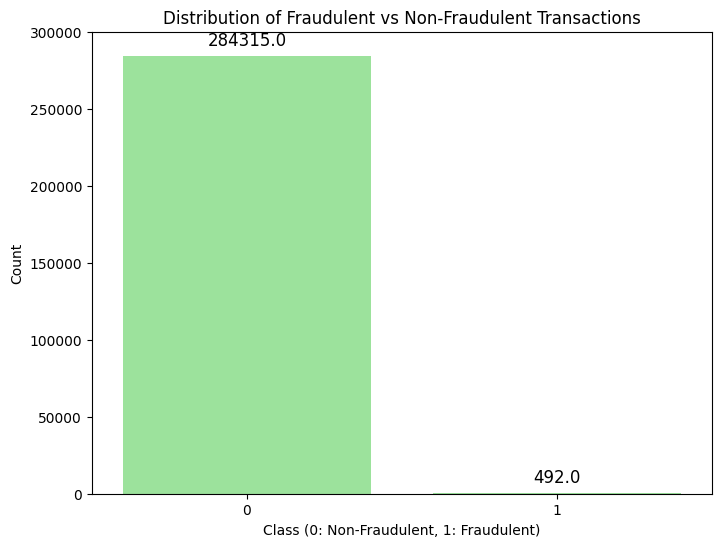

In [33]:
# Count Plot for Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df, color='lightgreen')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions')
plt.xlabel('Class (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Count')
plt.ylim(0, 300000)
# Adding count labels on top of the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='bottom', fontsize=12, color='black', xytext=(0, 5), 
                       textcoords='offset points')
plt.show()

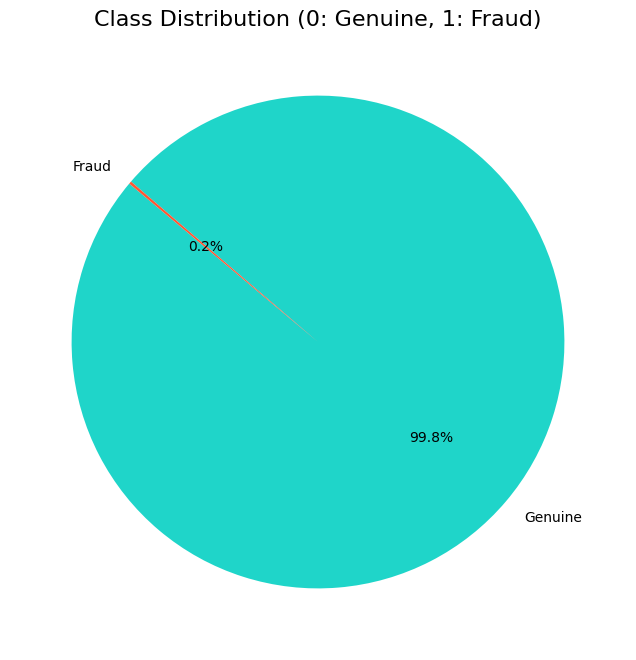

In [31]:
# Pie Chart for Class Percentage
plt.figure(figsize=(8, 8))
plt.pie(class_percentages, labels=['Genuine', 'Fraud'], autopct='%1.1f%%', startangle=140, colors=["#1FD5C9", '#FF5733'])
plt.title('Class Distribution (0: Genuine, 1: Fraud)', fontsize=16)
plt.show()

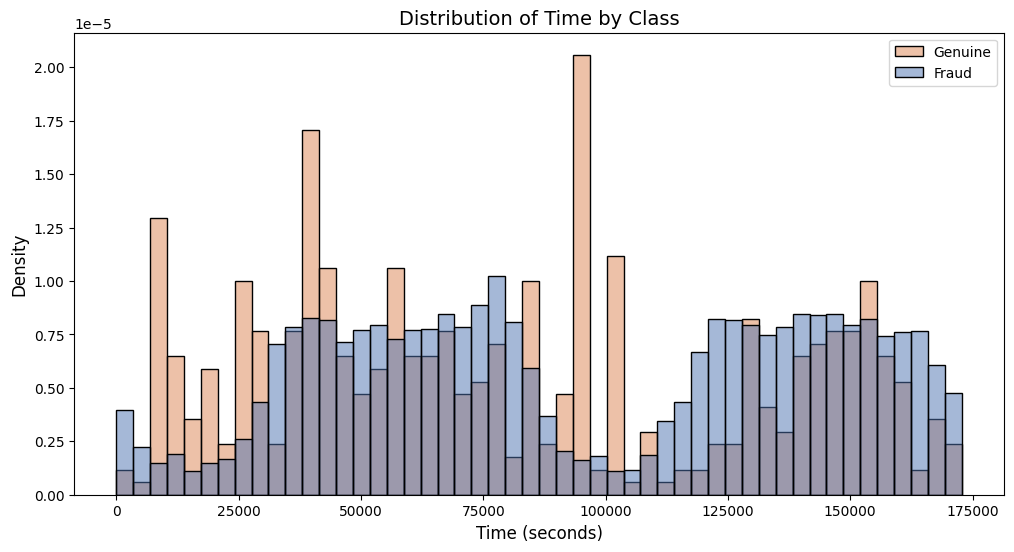

In [ ]:
# Visualize Time Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Time', hue='Class', bins=50, stat='density', common_norm=False)
plt.title('Distribution of Time by Class', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(labels=['Genuine', 'Fraud'])
plt.show()

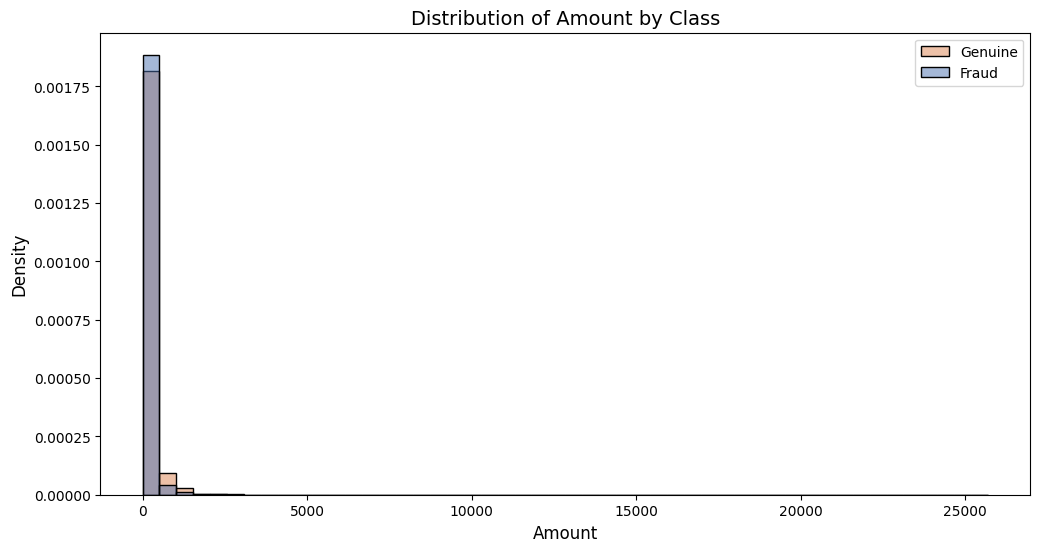

In [ ]:
# Visualize Amount Distribution
# Raw Amount
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Amount', hue='Class', bins=50, stat='density', common_norm=False)
plt.title('Distribution of Amount by Class', fontsize=14)
plt.xlabel('Amount', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(labels=['Genuine', 'Fraud'])
plt.show()

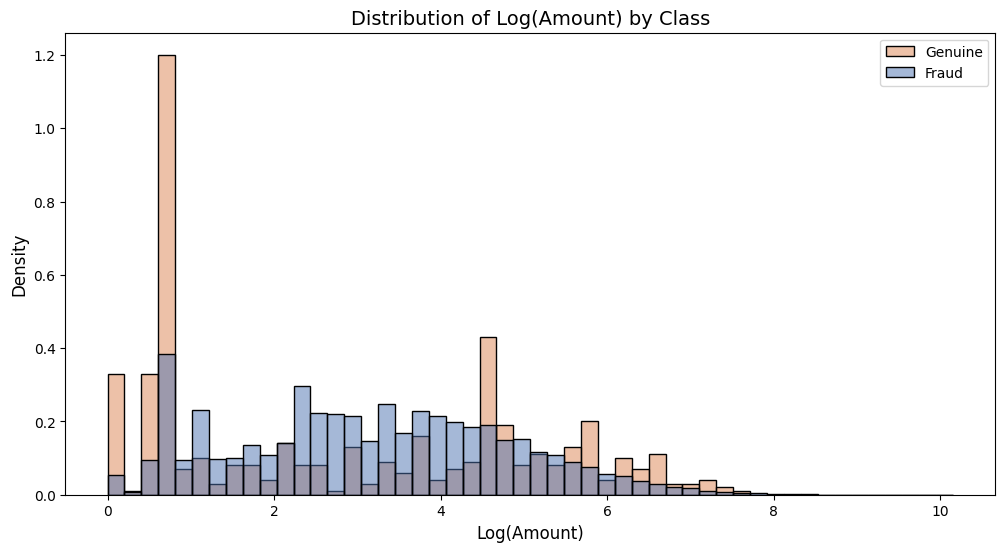

In [ ]:
# Log-transformed Amount (adding 1 to avoid log(0))
df['Log_Amount'] = np.log1p(df['Amount'])  # log(1 + Amount) to handle zeros
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Log_Amount', hue='Class', bins=50, stat='density', common_norm=False)
plt.title('Distribution of Log(Amount) by Class', fontsize=14)
plt.xlabel('Log(Amount)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(labels=['Genuine', 'Fraud'])
plt.show()

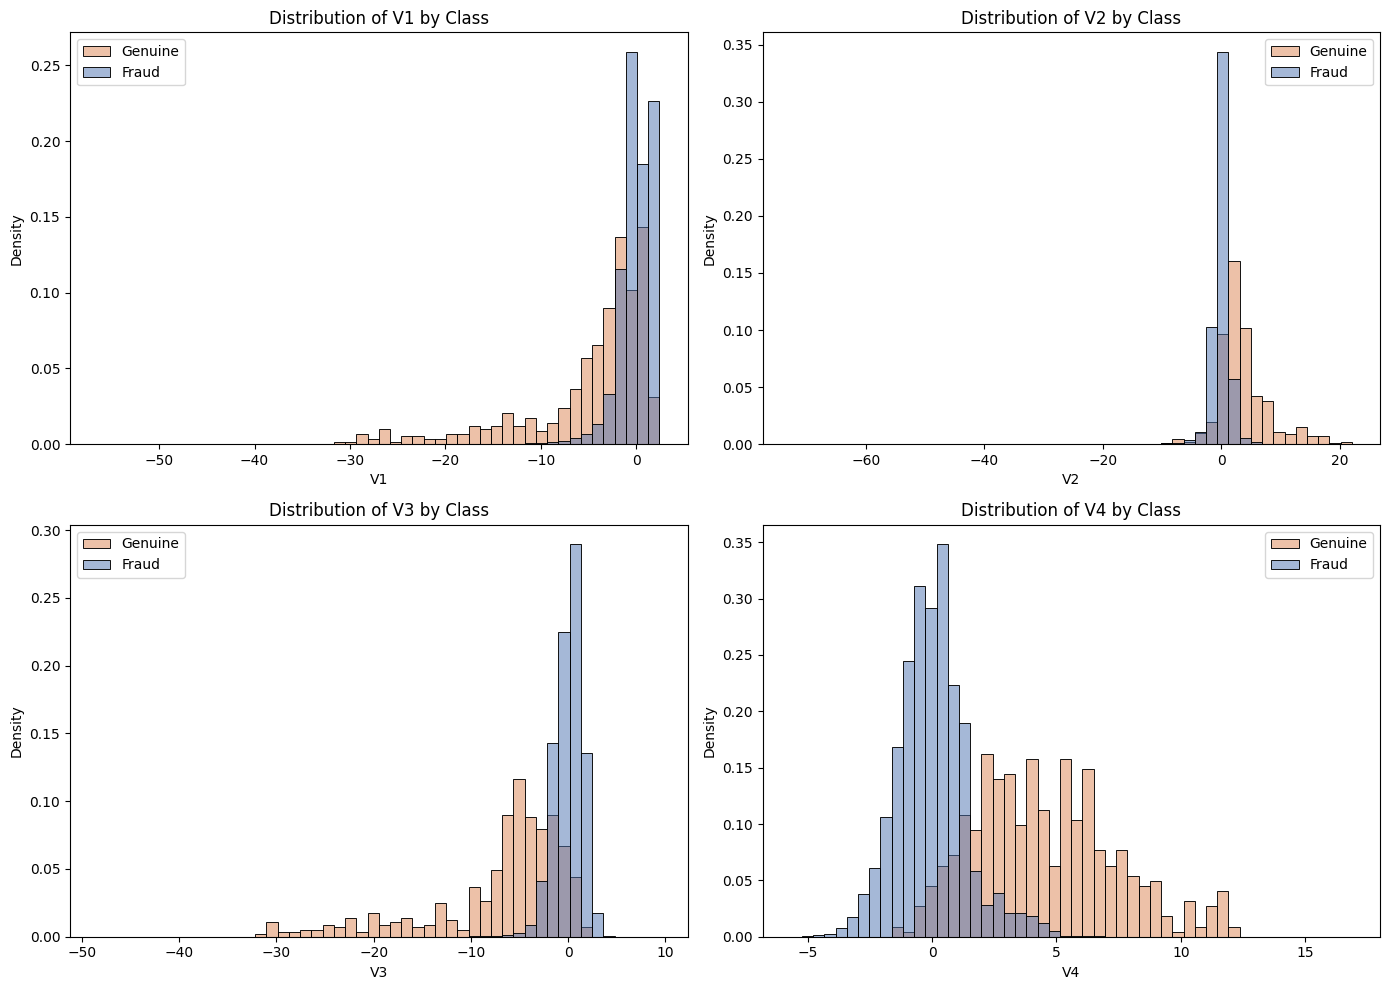

In [ ]:
# Visualize PCA Features (select V1, V2, V3, V4 for brevity)
pca_features = ['V1', 'V2', 'V3', 'V4']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, feature in enumerate(pca_features):
    sns.histplot(data=df, x=feature, hue='Class', bins=50, stat='density', common_norm=False, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature} by Class', fontsize=12)
    axes[i].set_xlabel(feature, fontsize=10)
    axes[i].set_ylabel('Density', fontsize=10)
    axes[i].legend(labels=['Genuine', 'Fraud'])
plt.tight_layout()
plt.show()

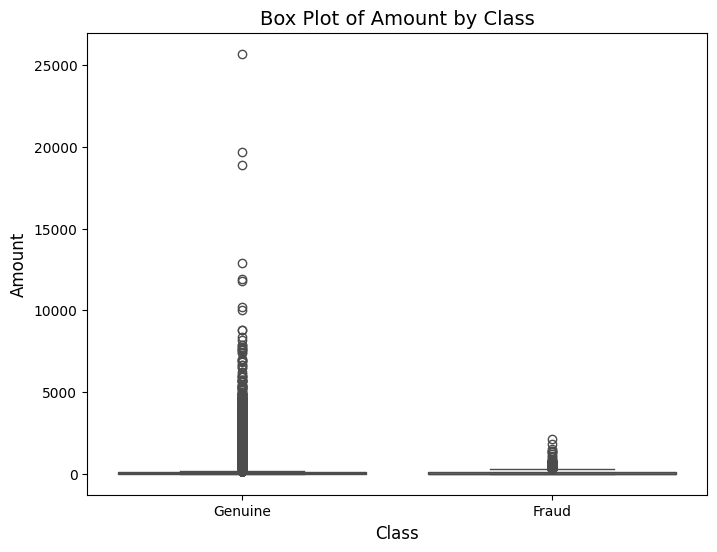

In [ ]:
# Box Plots for Amount and PCA Features
# Box Plot for Amount
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Box Plot of Amount by Class', fontsize=14)
plt.xlabel('Class', fontsize=12)
plt.ylabel('Amount', fontsize=12)
plt.xticks([0, 1], ['Genuine', 'Fraud'])
plt.show()

In [40]:
import warnings
warnings.filterwarnings("ignore")

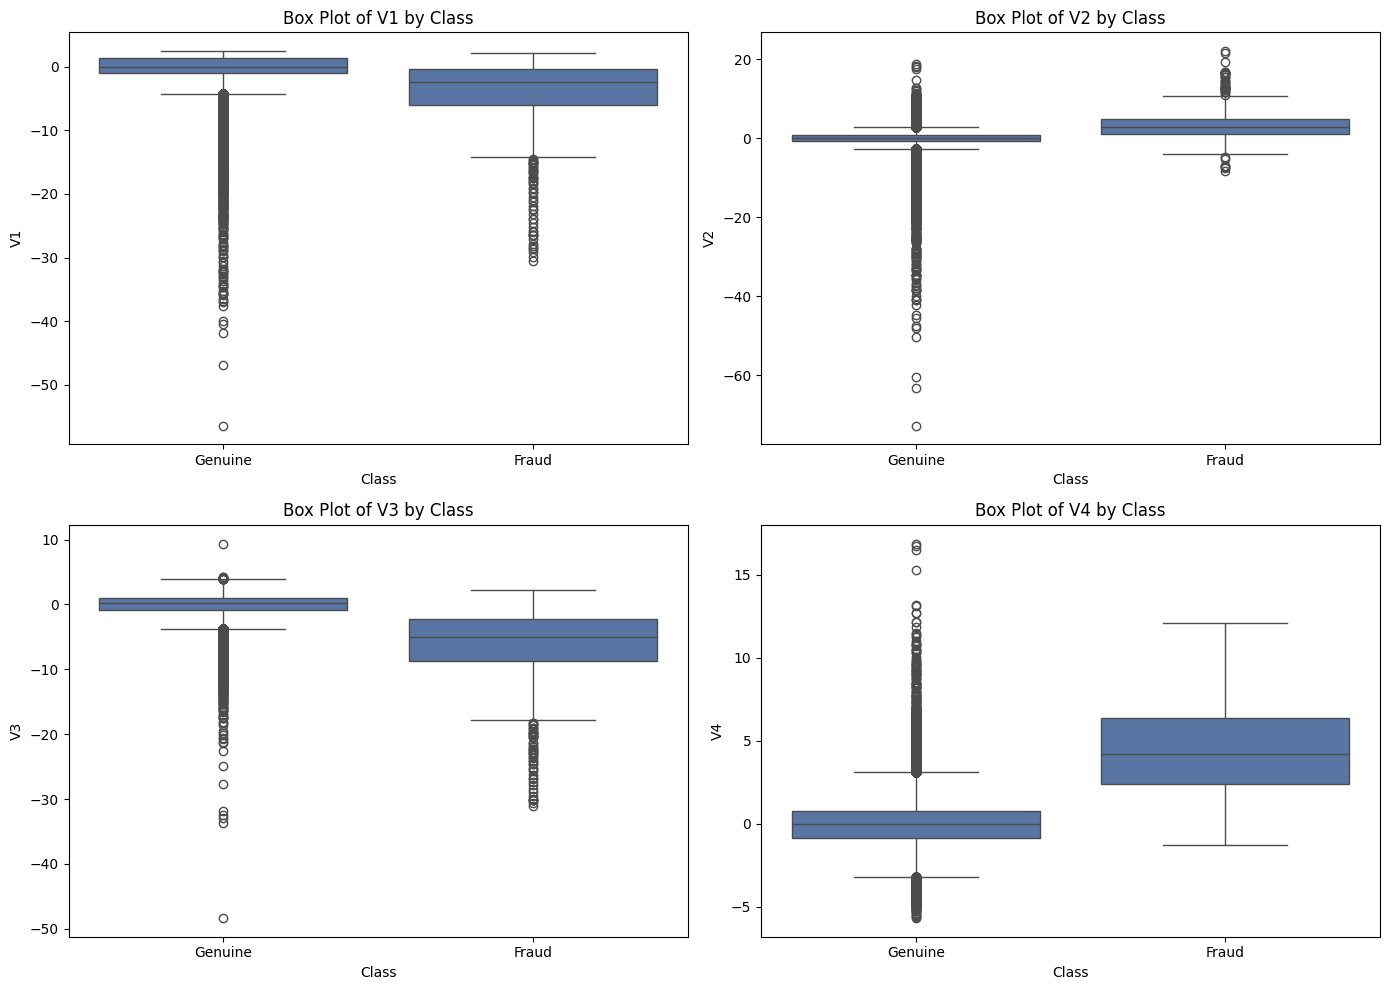

In [ ]:
# Box Plot for selected PCA features
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
for i, feature in enumerate(pca_features):
    sns.boxplot(x='Class', y=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature} by Class', fontsize=12)
    axes[i].set_xlabel('Class', fontsize=10)
    axes[i].set_ylabel(feature, fontsize=10)
    axes[i].set_xticklabels(['Genuine', 'Fraud'])
plt.tight_layout()
plt.show()

In [ ]:
# Summarize Findings (in Markdown or print)
print("Summary of Feature Distribution Findings:")
print("- Time: Likely shows periodic patterns over ~48 hours; check for fraud clustering at specific times.")
print("- Amount: Highly skewed, with fraud possibly having different patterns (e.g., smaller or larger amounts).")
print("- Log(Amount): More normal-like distribution, useful for modeling.")
print("- PCA Features: Some features (e.g., V1-V4) may show distinct distributions for fraud vs. genuine.")
print("- Outliers: Amount and PCA features may have outliers, potentially more in fraud class.")

Summary of Feature Distribution Findings:
- Time: Likely shows periodic patterns over ~48 hours; check for fraud clustering at specific times.
- Amount: Highly skewed, with fraud possibly having different patterns (e.g., smaller or larger amounts).
- Log(Amount): More normal-like distribution, useful for modeling.
- PCA Features: Some features (e.g., V1-V4) may show distinct distributions for fraud vs. genuine.
- Outliers: Amount and PCA features may have outliers, potentially more in fraud class.


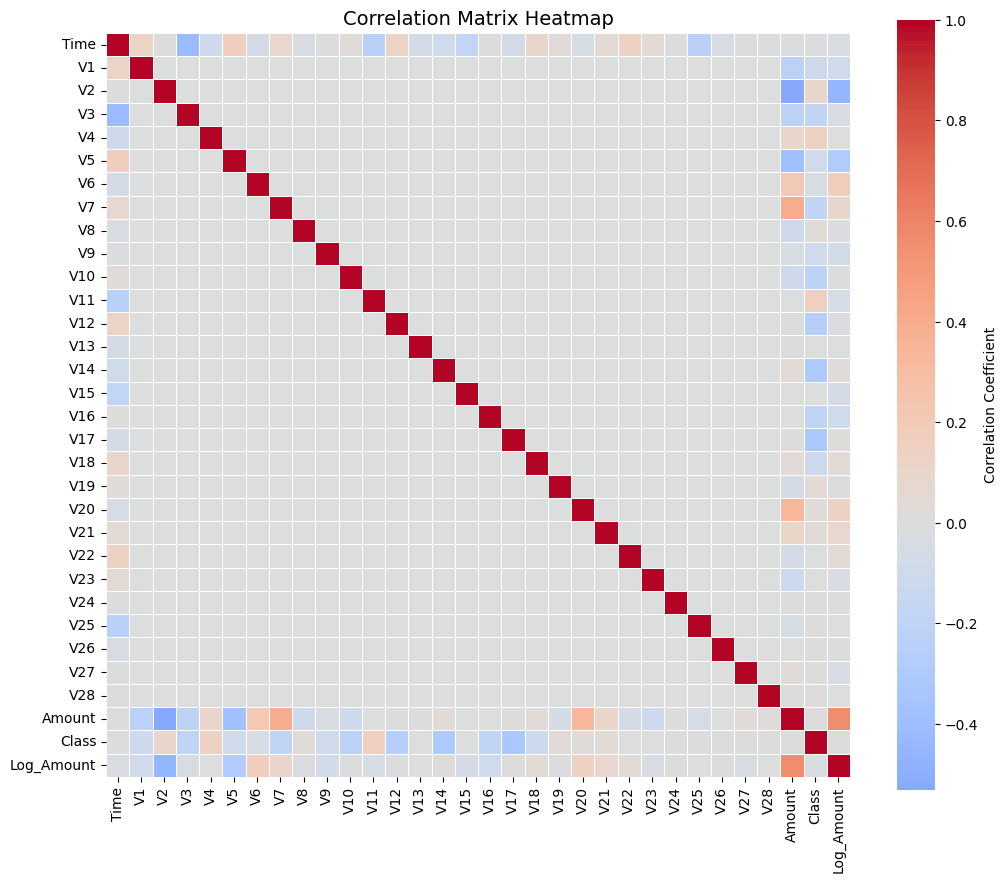

In [ ]:
# Compute the Correlation Matrix
correlation_matrix = df.corr()

# Visualize the Correlation Matrix with a Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"label": "Correlation Coefficient"})
plt.title('Correlation Matrix Heatmap', fontsize=14)
plt.show()

In [51]:
# Analyze Correlations with Class
class_correlations = correlation_matrix['Class'].sort_values(ascending=False)
print("\nCorrelations with Class (sorted):")
print(class_correlations)


Correlations with Class (sorted):
Class         1.000000
V11           0.154876
V4            0.133447
V2            0.091289
V21           0.040413
V19           0.034783
V20           0.020090
V8            0.019875
V27           0.017580
V28           0.009536
Amount        0.005632
V26           0.004455
V25           0.003308
V22           0.000805
V23          -0.002685
V15          -0.004223
V13          -0.004570
V24          -0.007221
Log_Amount   -0.008326
Time         -0.012323
V6           -0.043643
V5           -0.094974
V9           -0.097733
V1           -0.101347
V18          -0.111485
V7           -0.187257
V3           -0.192961
V16          -0.196539
V10          -0.216883
V12          -0.260593
V14          -0.302544
V17          -0.326481
Name: Class, dtype: float64


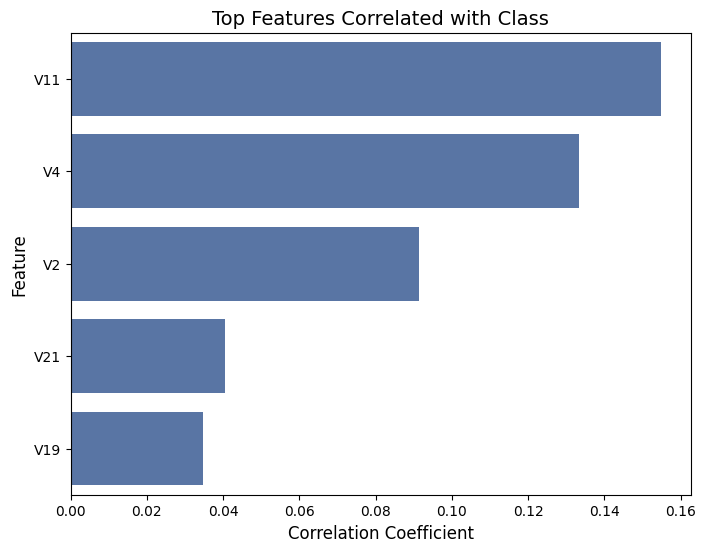

In [50]:
# Visualize Top Correlations with Class (Bar Plot)
top_features = class_correlations[1:6]
plt.figure(figsize=(8, 6))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top Features Correlated with Class', fontsize=14)
plt.xlabel('Correlation Coefficient', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

In [49]:
# Summarize Findings
print("\nSummary of Correlation Analysis Findings:")
print("- PCA features (V1-V28) should have near-zero correlations with each other due to PCA orthogonality.")
print("- Features like V4, V11, V2 may show stronger positive/negative correlations with Class.")
print("- Time and Amount may have weak correlations with Class, but check for significance.")
print("- Low correlations with Class are expected due to imbalance, but non-zero values indicate potential predictors.")


Summary of Correlation Analysis Findings:
- PCA features (V1-V28) should have near-zero correlations with each other due to PCA orthogonality.
- Features like V4, V11, V2 may show stronger positive/negative correlations with Class.
- Time and Amount may have weak correlations with Class, but check for significance.
- Low correlations with Class are expected due to imbalance, but non-zero values indicate potential predictors.


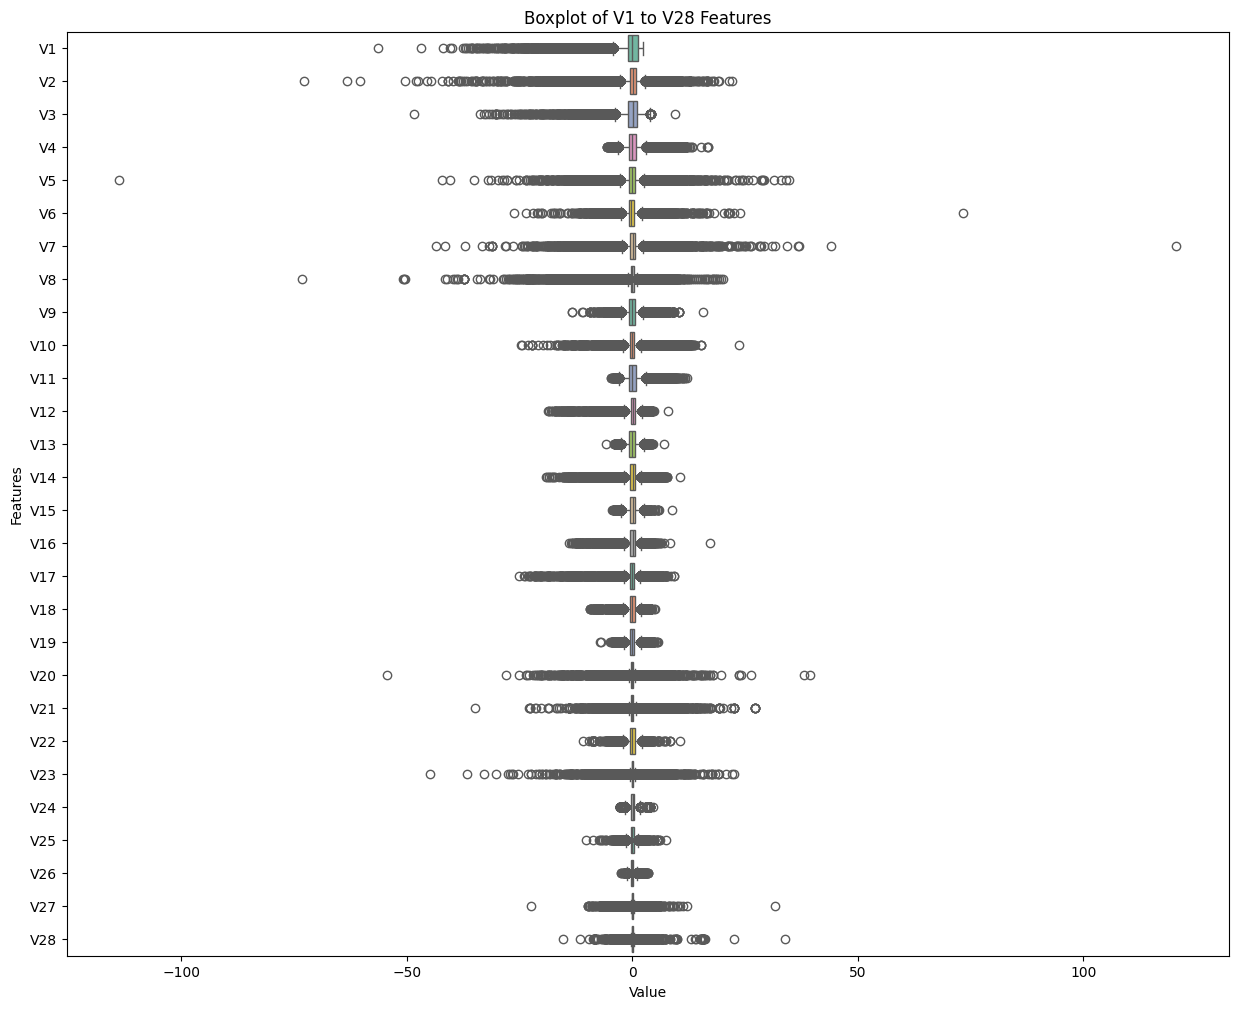

In [42]:
# distribution of V1 to V10 features
v_features = [col for col in df.columns if col.startswith('V')]
plt.figure(figsize=(15, 12))
sns.boxplot(data=df[v_features], orient='h', palette='Set2')
plt.title('Boxplot of V1 to V28 Features')
plt.xlabel('Value')
plt.ylabel('Features')
plt.show()

- **Significant Outlier Presence**: Almost all features show numerous outliers, which is particularly relevant for fraud detection as fraudulent transactions often exhibit unusual patterns that deviate from normal behavior.

- **Variable Scale Differences**: Features show different scales and ranges - some like V1, V2, V7, V20-V23 have wider distributions (±50), while others like V4, V9-V19, V24-V28 are tightly centered around 0, suggesting varying importance in distinguishing transaction patterns.

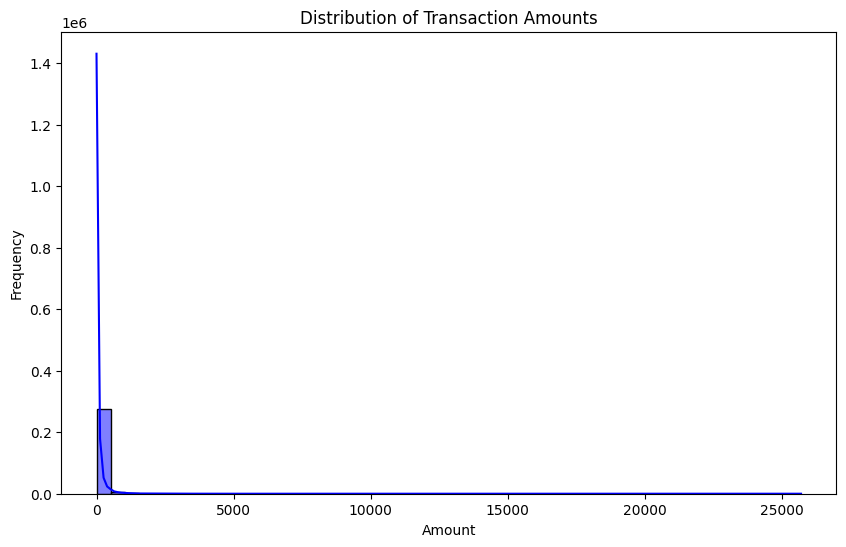

In [43]:
# Distribution of the amount feature
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=50, kde=True, color='blue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

- **Highly Right-Skewed Distribution**: The vast majority of transactions are small amounts (close to $0), with the distribution heavily concentrated in the lower range, indicating most transactions are everyday purchases.

- **Presence of High-Value Outliers**: There are very few but notable high-value transactions extending up to $25,000, which could be important for fraud detection as unusual transaction amounts often signal fraudulent activity.